In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
width = 1024#530#265
height = 1024#298#149

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()



Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,1
1,2,DSCF0900.JPG,800,specialty,1
2,3,DSCF0904.JPG,1250,specialty,1
3,4,DSCF0905.JPG,400,specialty,1
4,5,DSCF0910.JPG,800,specialty,1
...,...,...,...,...,...
535,536,DSCF1724.JPG,800,exchange,3
536,537,DSCF1725.JPG,1250,exchange,3
537,538,DSCF1726.JPG,400,exchange,3
538,539,DSCF1727.JPG,800,exchange,3


In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  # img = img.resize((width, height))#.convert('L') #265:149
  image_list.append(img)

label = dtLabel['label']

  0%|          | 0/540 [00:00<?, ?it/s]


FileNotFoundError: ignored

In [0]:
#   label = np.concatenate((label), axis=0)

In [0]:
# label

In [0]:
Y = label

In [0]:
len(label)

540

In [0]:
len(image_list)

540

# Showing Image

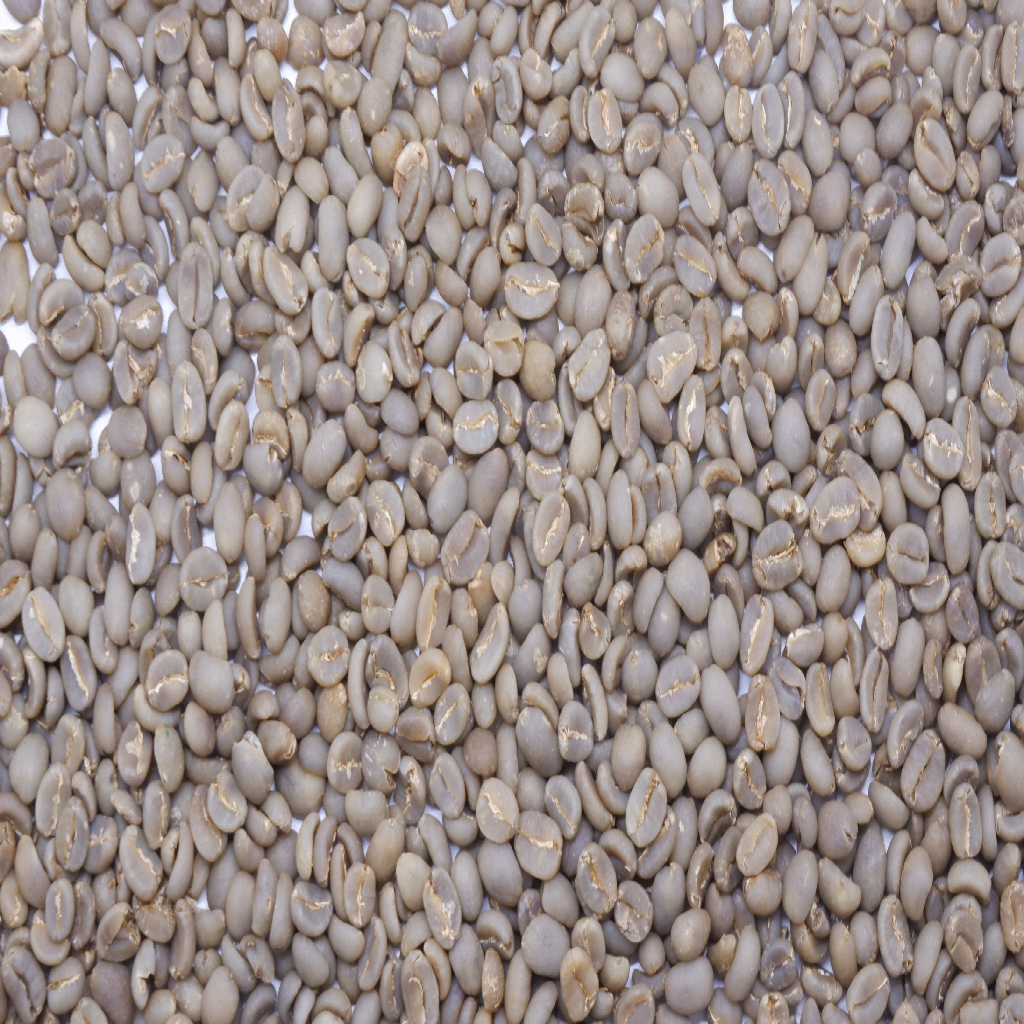

In [0]:
from IPython.display import Image as Img

display(image_list[60])
#print('')
#display(image_list[300])
#print('')
#display(image_list[499])
#print('')

In [0]:
image_list

# image pre-processing

In [0]:
img_crop = image_list

len(img_crop)

540

In [0]:
def get_random_crop(img_crop, crop_height, crop_width, dimension):
  
  crop = []
  coor = []

  for img in img_crop:
    img = np.array(img)
    # For untuk random crop sebanyak N
    max_x = img.shape[1] - crop_width
    max_y = img.shape[0] - crop_height

    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    coor.append([x,y])
    crop.append(img[y: y + crop_height, x: x + crop_width, :])

  return crop, coor

In [0]:
img_crop = np.random.randint(0, 256, (1024, 1024, 3))
random_crop, random_coor = get_random_crop(image_list, 540, 540, 3)

In [0]:
from IPython.display import Image as Img

from matplotlib import pyplot as plt

len(random_crop)

540

In [0]:
np.array(random_crop).shape

(540, 540, 540, 3)

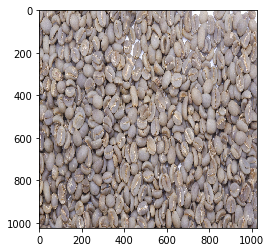

In [0]:
plt.imshow(image_list[50])

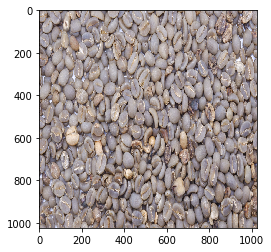

In [0]:
plt.imshow(image_list[400])

[50, 307]

[463, 173]


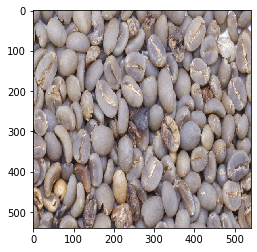

In [0]:
plt.imshow(random_crop[50])
print(random_coor[50])

#display(random_crop[539])

[463, 173]


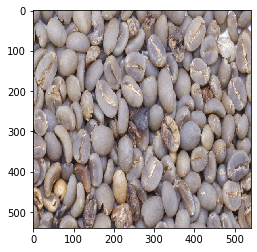

In [0]:
plt.imshow(random_crop[400])
print(random_coor[400])

In [0]:
from matplotlib import image
from matplotlib import pyplot

from numpy import asarray

X = []

#for iimage in image_list:
for iimage in random_crop:
    data = np.asarray(iimage)
    # summarize shape
    # print(data.shape)
    # create Pillow image
    # image2 = Image.fromarray(data)
    X.append(data)

In [0]:
X[0].shape

(540, 540, 3)

In [0]:
# X = np.array(X)
# X.shape
X = [x.flatten(X) for x in X]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


In [0]:
X = np.array(X)
X[0]

array([255, 255, 255, ..., 124, 117, 119], dtype=uint8)

In [0]:
len(X)

540

In [0]:
X.shape

(540, 874800)

# Classification

KNN

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=33)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
neigh.score(X_test,y_test)

0.2839506172839506

SVM

In [0]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

clf.score(X_test,y_test)


0.2962962962962963